Control and State estimation of unstable system

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import control

In [34]:
A = np.matrix('0 1; 2 -1')
B = np.matrix("1; 0")
C = np.matrix("1 0")
D = 0
sys = control.ss(A, B, C, D)  # Creating the state space object
print(A)

[[ 0  1]
 [ 2 -1]]


In order to determine the stability of the system, its eigen values are determined by evaluating the following

$$
det(\mathbf{A} - \lambda\mathbf{I}) =
det \begin{bmatrix}
0 - \lambda & 1 \\
2 & -1 -\lambda
\end{bmatrix}
= 0
$$

$$
(-\lambda)(-1-\lambda) - 2 = 0
$$

$$
 \lambda^2 + \lambda - 2 = 0
$$

$$
\lambda = -2  \vee \lambda = 1
$$

As can be seen, the system has the positive eigen value $\lambda=1$, thus the system has an unstable pole*

In [35]:
# Getting eigenvalues with np.linalg
eig = np.linalg.eigvals(A)
print(f"The eigenvalues to the system matrix A is: k_1={eig[0]}, and k_2={eig[1]}")

The eigenvalues to the system matrix A is: k_1=1.0, and k_2=-2.0


Plot the step response and PZ-map of the system

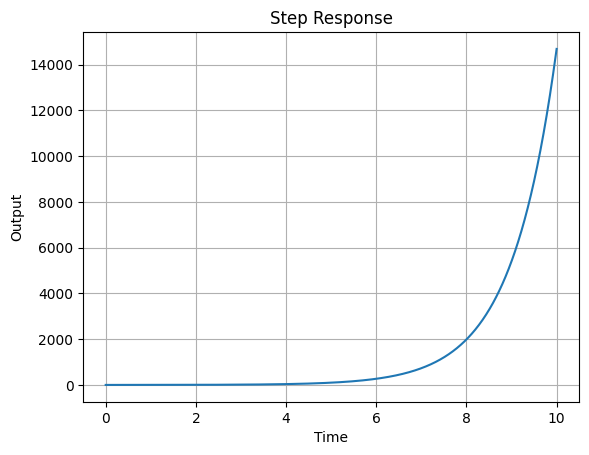

In [36]:
t = np.linspace(0, 10, 1000)
u = np.ones_like(t)

t, y = control.step_response(sys, T=t, X0=[0,0], input=u)

# Plot the response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid(True)
plt.show()

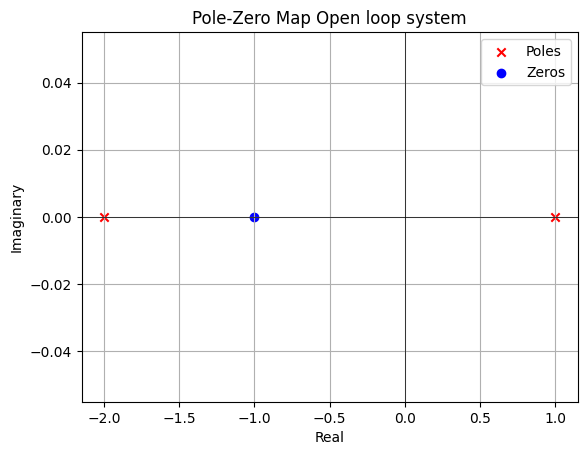

In [37]:
poles = control.poles(sys)
zeros = control.zeros(sys)

plt.figure()
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Poles')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map Open loop system')
plt.legend()
plt.grid(True)
plt.show()